In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [35]:
train = pd.read_csv('train.csv', nrows=10000)

In [40]:
train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  pickup_hour  \
0         40.765602                  N            455           17   
1         40.731152                  N            663            0   
2         40.710087                  N           2124           11   
3         40.706718                  N            429           19   
4         40.782520                  N            435           13   

   dropoff_hour  
0            17  
1             0  
2            12  
3            19  
4            13

In [37]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [38]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)

In [39]:
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['dropoff_hour'] = train['dropoff_datetime'].dt.hour

In [41]:
train_relevant = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_hour', 'dropoff_hour']]

In [50]:
train_relevant = train_relevant[train_relevant['trip_duration'] < 20000]

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(train_relevant)

In [52]:
kmeans.labels_

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [53]:
kmeans.cluster_centers_

array([[ -73.9722477 ,   40.74928716,  -73.97004708,   40.74936173,
        1214.83747547,   13.69293656,   13.73217789],
       [ -73.92186648,   40.73094417,  -73.94245622,   40.73483587,
        2633.27642276,   14.24390244,   14.43902439],
       [ -73.97862432,   40.75382165,  -73.97763933,   40.75458694,
         463.78356555,   13.5660228 ,   13.60956301]])

In [45]:
from sklearn import metrics

In [47]:
labels = kmeans.labels_
metrics.silhouette_score(train_relevant, labels, metric='euclidean')

TypeError: euclidean_distances() got an unexpected keyword argument 'gcv_mode'

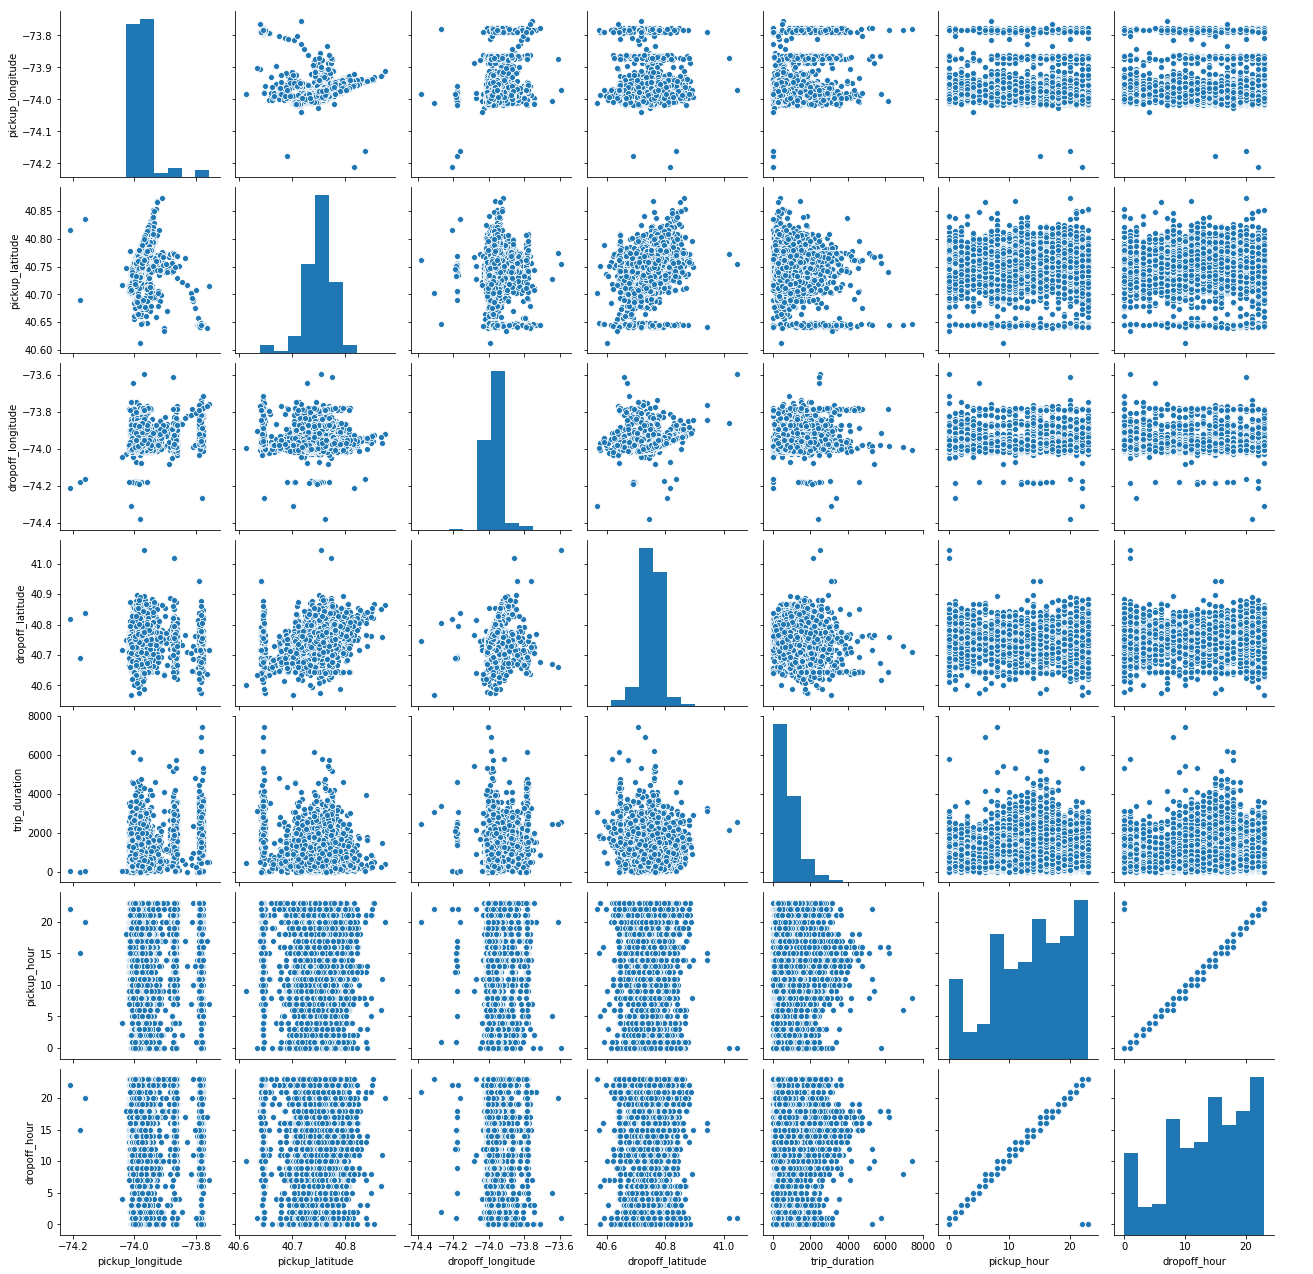

In [54]:
sns.pairplot(train_relevant)